<a href="https://colab.research.google.com/github/Mikepa22/Tools-IA-ML/blob/main/Regresi%C3%B3n_realstate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns # librería para gráficos estadisticos mas especializados
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #División del dataset
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score #Métricas

# Exploración del dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data = pd.read_csv('/content/drive/MyDrive/Realstate.csv')
data.head()

Mounted at /content/drive


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
datos=data.drop(['No','X5 latitude','X6 longitude'],axis=1)
datos.set_axis(['trans_date', 'house_age', 'dist_near_station','number_stores','house$/ua'], axis='columns', inplace=True)
datos.head()

<ipython-input-14-af502fe47474>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  datos.set_axis(['trans_date', 'house_age', 'dist_near_station','number_stores','house$/ua'], axis='columns', inplace=True)


,trans_date,house_age,dist_near_station,number_stores,house$/ua
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


# Correlación

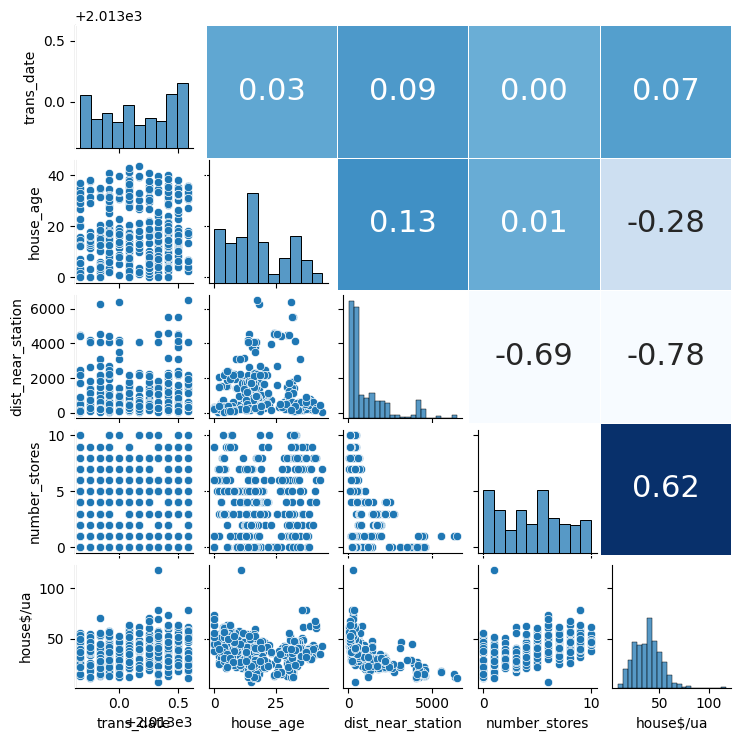

In [ ]:
def hide_axis(*args, **kwds):
    plt.gca().set_visible(False)

correlacion = datos.corr(method="spearman")
CorrPair = sns.pairplot(datos, height=1.5)
CorrPair.map_upper(hide_axis)

(xmin, _), (_, ymax) = CorrPair.axes[0, 0].get_position().get_points()
(_, ymin), (xmax, _) = CorrPair.axes[-1, -1].get_position().get_points()

ax = CorrPair.fig.add_axes([xmin, ymin, xmax - xmin, ymax - ymin], facecolor='none')

mask1 = np.tril(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, mask=mask1,
            cmap='Blues', vmax=.5, vmin=-.5, fmt=".2f",
            linewidths=.5, cbar=False, annot=True, annot_kws={'size': 22}, ax=ax)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

# Normalización de variables

In [ ]:
#Variables Estimadoras
scaler1 = MinMaxScaler(feature_range=(-1, 1))
#scaler1 = StandardScaler()
x_n=scaler1.fit_transform(datos[['house_age','dist_near_station','number_stores']]) # Ubicar variables seleccionadas
x_n = np.array(x_n)

#Salida a predecir
y_n = datos['house$/ua'].values
y_n = y_n.reshape(-1,1)
y_n = np.array(y_n)

print("Variables predictoras:", x_n.shape, "\nVariables a estimar:", y_n.shape)
datos_nor = np.append(x_n,y_n,1)
datos_nor = pd.DataFrame(datos_nor)
datos_nor.columns = ['house_age','dist_near_station','number_stores','house$/ua'] # Variables seleccionadas y salida
datos_nor.head()

Variables predictoras: (414, 3) 
Variables a estimar: (414, 1)


,house_age,dist_near_station,number_stores,house$/ua
0,0.461187,-0.980975,1.0,37.9
1,-0.109589,-0.912381,0.8,42.2
2,-0.392694,-0.833370,0.0,47.3
3,-0.392694,-0.833370,0.0,54.8
4,-0.771689,-0.886402,0.0,43.1


# División del dataset

In [ ]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(datos_nor[['house_age','dist_near_station','number_stores']], datos_nor[['house$/ua']], test_size = 0.2, random_state = 42)
print(X_train_n.shape, y_train_n.shape)
print(X_test_n.shape, y_test_n.shape)

(331, 3) (331, 1)
(83, 3) (83, 1)


# Regresión por mínimos cuadrados

### Datos de entrenamiento

In [ ]:
Regresor_OLS_Train=np.c_[np.ones((X_train_n.shape[0],1)),X_train_n] #Creación del Regresor, al usar shape se acomoda a cualquier tamaño y dataset
#print(Regresor_OLS_Train.shape)
Theta_OLS = np.linalg.inv(Regresor_OLS_Train.T.dot(Regresor_OLS_Train)).dot(Regresor_OLS_Train.T).dot(y_train_n) #Ecuacion vista en clase
y_pred_Train_OLS = Regresor_OLS_Train.dot(Theta_OLS)
print("Coeficientes:\n")
for i, valor in enumerate(Theta_OLS):
  print(f"theta_{i} = {valor}")

Coeficientes:

theta_0 = [26.19154356]
theta_1 = [-5.65907885]
theta_2 = [-17.77240324]
theta_3 = [6.23671241]


### Datos de validación

In [ ]:
Regresor_OLS_Test = np.c_[np.ones((X_test_n.shape[0],1)),X_test_n] ##Creación del Regresor, al usar shape se acomoda a cualquier tamaño y dataset
print(Regresor_OLS_Test.shape)
y_pred_test_OLS = Regresor_OLS_Test.dot(Theta_OLS)

(83, 4)


### Métricas

In [ ]:
#datos de entrenamiento
mse_train = mean_squared_error(y_train_n, y_pred_Train_OLS)
rmse_train = np.sqrt(mse_train)
r_squared_train = r2_score(y_train_n, y_pred_Train_OLS)
print("MSE =", mse_train)
print("RMSE =", rmse_train)
print("R2 =",r_squared_train)

MSE = 91.29092589286635
RMSE = 9.554628506272044
R2 = 0.5146436173066767


In [ ]:
#datos de validación
mse_test = mean_squared_error(y_test_n, y_pred_test_OLS)
rmse_test = np.sqrt(mse_test)
r_squared_test = r2_score(y_test_n, y_pred_test_OLS)
print("MSE =", mse_test)
print("RMSE =", rmse_test)
print("R2 =",r_squared_test)

MSE = 75.58570700589283
RMSE = 8.694004083613766
R2 = 0.5480002720789091


# Regresión Scikit-Learn (OLS)

### Datos entrenamiento

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train_n, y_train_n)
y_pred_train_scikit = regressor.predict(X_train_n)
print("\nIntercepto:\n\ntheta_0 = ",regressor.intercept_)
print("\nCoeficientes:\n")
for i, valor in enumerate(regressor.coef_.T):
  print(f"theta_{i+1} = {valor}")


Intercepto:

theta_0 =  [26.19154356]

Coeficientes:

theta_1 = [-5.65907885]
theta_2 = [-17.77240324]
theta_3 = [6.23671241]


### Datos validación

In [ ]:
y_pred_test_scikit = regressor.predict(X_test_n)
#print(y_pred_test_scikit)

### Métricas

In [ ]:
#datos de entrenamiento
mse_train = mean_squared_error(y_train_n, y_pred_train_scikit)
rmse_train = np.sqrt(mse_train)
r_squared_train = r2_score(y_train_n, y_pred_train_scikit)
print("MSE =", mse_train)
print("RMSE =", rmse_train)
print("R2 =",r_squared_train)

MSE = 91.29092589286637
RMSE = 9.554628506272046
R2 = 0.5146436173066766


In [ ]:
#datos de validación
mse_test = mean_squared_error(y_test_n, y_pred_test_scikit)
rmse_test = np.sqrt(mse_test)
r_squared_test = r2_score(y_test_n, y_pred_test_scikit)
print("MSE =", mse_test)
print("RMSE =", rmse_test)
print("R2 =",r_squared_test)

MSE = 58.88825128983576
RMSE = 7.673868078735506
R2 = 0.6489726933106555


# Gradiente descendente

In [ ]:
def gradient_descent(theta, x, y):
  y_gorro = x.dot(theta)
  error = (y - y_gorro)
  cost = (1.0 / len(x)) * np.sum(np.square(error))
  gradient = -(2.0 / len(x)) * error.dot(x)
  return gradient, cost

In [ ]:
hist_theta = []
hist_errors = []
alpha = 0.2 #Alpha
iterations = 500
tolerance = 1e-3
theta_GD = np.random.randn(X_train_n.shape[1] + 1) #Se estan generando de forma automatica tantos valores unitarios como columnas tenga el regresor.
print("Condiciones iniciales aleatorias: \n",theta_GD)

Condiciones iniciales aleatorias: 
 [-0.46750226 -0.36728363  1.27075057  0.30784104]


In [ ]:
Regresor_GD_train = np.c_[np.ones((X_train_n.shape[0])),X_train_n] # Creación del regresor para entrenar
print(Regresor_GD_train.shape)

(331, 4)


In [ ]:
iter = 0
for i in range(iterations):
  gradient, error = gradient_descent(theta_GD, Regresor_GD_train, y_train_n.squeeze())
  new_theta = theta_GD - alpha * gradient #actualización de parámetros
  hist_theta.append(new_theta)
  hist_errors.append(error)
  convergence = np.sum(abs(new_theta - theta_GD)) < tolerance

  if convergence == True:
    print("Convergence FOUND")
    print("Iteraciones:", str(i))
    print('Final cost/MSE:  {:0.4f}'.format(hist_errors[i]))
    print('Parameters:')
    for i, valor in enumerate(theta_GD):
      print(f"theta_{i} = {valor}")
    break

  else:
    if (i+1) == iterations:
      print("Number of iterations reached")
      print('Final cost/MSE:  {:0.6f}'.format(hist_errors[-1]))
      print('Parameters:')
      for i, valor in enumerate(theta_GD):
        print(f"theta_{i} = {valor}")

  theta_GD = new_theta

Convergence FOUND
Iteraciones: 240
Final cost/MSE:  91.2910
Parameters:
theta_0 = 26.174338067704237
theta_1 = -5.658624510353181
theta_2 = -17.79400823226655
theta_3 = 6.226406732972916


### Datos de entrenamiento

In [ ]:
y_pred_train_gd = Regresor_GD_train.dot(theta_GD)

### Datos de validación

In [ ]:
Regresor_GD_test = np.c_[np.ones((X_test_n.shape[0],1)),X_test_n] # Creación del regresor con datos nuevos
print(Regresor_GD_test.shape)
y_pred_test_gd = Regresor_GD_test.dot(theta_GD)

(83, 4)


### Métricas

In [ ]:
#datos de entrenamiento
mse_train = mean_squared_error(y_train_n, y_pred_train_gd)
rmse_train = np.sqrt(mse_train)
r_squared_train = r2_score(y_train_n, y_pred_train_gd)

print("MSE =", mse_train)
print("RMSE =", rmse_train)
print("R2 =",r_squared_train)

MSE = 91.29096934379724
RMSE = 9.554630780087592
R2 = 0.5146433862959117


In [ ]:
#datos de validación
mse_test = mean_squared_error(y_test_n, y_pred_test_gd)
rmse_test = np.sqrt(mse_test)
r_squared_test = r2_score(y_test_n, y_pred_test_gd)
print("MSE =", mse_test)
print("RMSE =", rmse_test)
print("R2 =",r_squared_test)

MSE = 58.89611632447676
RMSE = 7.674380517310616
R2 = 0.6489258105816463


In [ ]:
X_test_n

,house_age,dist_near_station,number_stores
358,-0.949772,-0.947344,0.2
350,-0.397260,-0.854950,0.0
373,-1.000000,-0.922461,-0.8
399,-0.420091,-0.954600,-0.8
369,-0.077626,-0.331209,-0.4
...,...,...,...
31,0.351598,-0.769200,0.4
283,0.529680,-0.395082,-0.6
157,-0.264840,-0.754805,-0.2
203,-0.287671,-0.917724,0.0


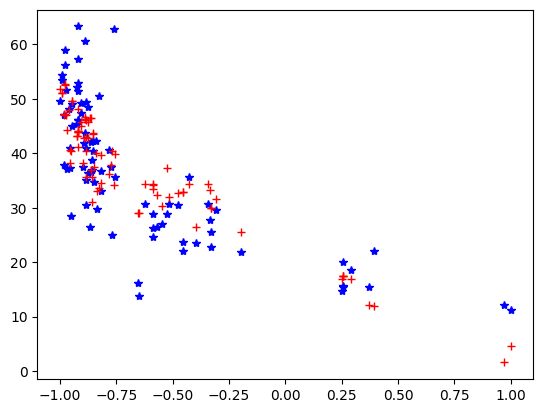

In [ ]:
plt.plot(X_test_n['dist_near_station'],y_test_n,'b*')
plt.plot(X_test_n['dist_near_station'],y_pred_test_gd,'r+')#Graficos de regresión parcial, 1 variable independiente vs variable dependiente
plt.show()